<a href="https://colab.research.google.com/github/yash5891/Machine-Learning-Assignments/blob/main/Rice_ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re

In [2]:
rice2019=pd.read_csv('/content/Rice_2019.csv')
rice2020=pd.read_csv('/content/Rice_2020.csv')
rice2021=pd.read_csv('/content/Rice_2021.csv')
rice2022=pd.read_csv('/content/Rice_2022.csv')
rice2023=pd.read_csv('/content/Rice_2023.csv')
rice2024=pd.read_csv('/content/Rice_2024.csv')


In [3]:
Rice=pd.concat([rice2019,rice2020,rice2021,rice2022,rice2023,rice2024])

In [4]:
Rice.head()

,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price,update_date
0,Andhra Pradesh,Kurnool,Allagadda,Rice,Sona,01/01/2019,3100.0,3300.0,3150.0,NaN
1,Andhra Pradesh,Kurnool,Allagadda,Rice,Sona,02/01/2019,3150.0,3250.0,3200.0,NaN
2,Andhra Pradesh,Kurnool,Allagadda,Rice,Sona,03/01/2019,3100.0,3300.0,3200.0,NaN
3,Andhra Pradesh,Kurnool,Allagadda,Rice,Sona,04/01/2019,3100.0,3250.0,3150.0,NaN
4,Andhra Pradesh,Kurnool,Allagadda,Rice,Sona,05/01/2019,3100.0,3300.0,3200.0,NaN


In [5]:
Rice['cost of cultivation']=0

In [6]:
Rice.loc[Rice['state']=='Gujarat','cost of cultivation']=24513

In [7]:
Rice.loc[Rice['state']=='Jharkhand','cost of cultivation']=19164

In [8]:
Rice.loc[Rice['state']=='Karnataka','cost of cultivation']=24334

In [9]:
Rice.loc[Rice['state']=='Andhra Pradesh','cost of cultivation']=28062

In [10]:
Rice.loc[Rice['state']=='Bihar','cost of cultivation']=18727

In [11]:
Rice.loc[Rice['state']=='Gujarat','cost of cultivation']=24513

In [12]:
Rice.loc[Rice['cost of cultivation']==0,'cost of cultivation']=34428

In [13]:
Rice.head()

,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price,update_date,cost of cultivation
0,Andhra Pradesh,Kurnool,Allagadda,Rice,Sona,01/01/2019,3100.0,3300.0,3150.0,NaN,28062
1,Andhra Pradesh,Kurnool,Allagadda,Rice,Sona,02/01/2019,3150.0,3250.0,3200.0,NaN,28062
2,Andhra Pradesh,Kurnool,Allagadda,Rice,Sona,03/01/2019,3100.0,3300.0,3200.0,NaN,28062
3,Andhra Pradesh,Kurnool,Allagadda,Rice,Sona,04/01/2019,3100.0,3250.0,3150.0,NaN,28062
4,Andhra Pradesh,Kurnool,Allagadda,Rice,Sona,05/01/2019,3100.0,3300.0,3200.0,NaN,28062


In [14]:
Rice.isnull().sum()

state                       0
district                    0
market                      0
commodity                   0
variety                     0
arrival_date                0
min_price                  30
max_price                  39
modal_price                 0
update_date            210257
cost of cultivation         0
dtype: int64

In [15]:
Rice['cost of cultivation'].unique()

array([28062, 34428, 24513, 19164, 24334, 18727])

In [16]:
Rice['Yield (kg/ha)']=0


In [17]:
Rice.loc[Rice['state']=='Gujarat','Yield (kg/ha)']=1356


In [18]:
Rice.loc[Rice['state']=='Karnataka','Yield (kg/ha)']=3000

In [19]:
Rice.loc[Rice['state']=='Kerala','Yield (kg/ha)']=2884

In [20]:
Rice.loc[Rice['state']=='Maharashtra','Yield (kg/ha)']=1800

In [21]:
Rice.loc[Rice['state']=='Jharkhand','Yield (kg/ha)']=960

In [22]:
Rice.loc[Rice['state']=='Manipur','Yield (kg/ha)']=1230

In [23]:
Rice.loc[Rice['state']=='Odisha','Yield (kg/ha)']=2300

In [24]:
Rice.loc[Rice['state']=='Tripura','Yield (kg/ha)']=2200

In [25]:
Rice.loc[Rice['state']=='Uttar Pradesh','Yield (kg/ha)']=2700

In [26]:
Rice.loc[Rice['state']=='Uttrakhand','Yield (kg/ha)']=2800

In [27]:
Rice.loc[Rice['state']=='West Bengal','Yield (kg/ha)']=2600

In [28]:
Rice.loc[Rice['state']=='Telangana','Yield (kg/ha)']=3700

In [29]:
Rice.loc[Rice['state']=='Andhra Pradesh','Yield (kg/ha)']=3395

In [30]:
Rice.loc[Rice['state']=='Bihar','Yield (kg/ha)']=2200

In [31]:
Rice.loc[Rice['state']=='NCT of Delhi','Yield (kg/ha)']=2000

In [32]:
Rice.loc[Rice['state']=='Madhya Pradesh','Yield (kg/ha)']=2789

In [33]:
Rice.loc[Rice['state']=='Meghalaya','Yield (kg/ha)']=1290

In [34]:
Rice.loc[Rice['state']=='Punjab','Yield (kg/ha)']='4000-5000'

In [35]:
Rice.loc[Rice['state']=='Rajasthan','Yield (kg/ha)']=1149

In [36]:
Rice.head()

,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price,update_date,cost of cultivation,Yield (kg/ha)
0,Andhra Pradesh,Kurnool,Allagadda,Rice,Sona,01/01/2019,3100.0,3300.0,3150.0,NaN,28062,3395
1,Andhra Pradesh,Kurnool,Allagadda,Rice,Sona,02/01/2019,3150.0,3250.0,3200.0,NaN,28062,3395
2,Andhra Pradesh,Kurnool,Allagadda,Rice,Sona,03/01/2019,3100.0,3300.0,3200.0,NaN,28062,3395
3,Andhra Pradesh,Kurnool,Allagadda,Rice,Sona,04/01/2019,3100.0,3250.0,3150.0,NaN,28062,3395
4,Andhra Pradesh,Kurnool,Allagadda,Rice,Sona,05/01/2019,3100.0,3300.0,3200.0,NaN,28062,3395


In [37]:
Rice.drop('update_date',axis=1,inplace=True)
Rice.head()

,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price,cost of cultivation,Yield (kg/ha)
0,Andhra Pradesh,Kurnool,Allagadda,Rice,Sona,01/01/2019,3100.0,3300.0,3150.0,28062,3395
1,Andhra Pradesh,Kurnool,Allagadda,Rice,Sona,02/01/2019,3150.0,3250.0,3200.0,28062,3395
2,Andhra Pradesh,Kurnool,Allagadda,Rice,Sona,03/01/2019,3100.0,3300.0,3200.0,28062,3395
3,Andhra Pradesh,Kurnool,Allagadda,Rice,Sona,04/01/2019,3100.0,3250.0,3150.0,28062,3395
4,Andhra Pradesh,Kurnool,Allagadda,Rice,Sona,05/01/2019,3100.0,3300.0,3200.0,28062,3395


In [38]:
Rice.shape

(301032, 11)

In [39]:
Rice.isnull().sum()

state                   0
district                0
market                  0
commodity               0
variety                 0
arrival_date            0
min_price              30
max_price              39
modal_price             0
cost of cultivation     0
Yield (kg/ha)           0
dtype: int64

In [40]:
len(Rice['variety'].unique())

66

In [41]:
len(Rice['state'].unique())

22

In [42]:
len(Rice['district'].unique())

223

In [43]:
len(Rice['market'].unique())

539

In [44]:
Gujarat=Rice[Rice['state']=='Gujarat']
Gujarat.head()

,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price,cost of cultivation,Yield (kg/ha)
1191,Gujarat,Bharuch,Jambusar,Rice,Other,01/01/2019,2800.0,3200.0,3000.0,24513,1356
1192,Gujarat,Bharuch,Jambusar,Rice,Other,02/01/2019,2800.0,3200.0,3000.0,24513,1356
1193,Gujarat,Bharuch,Jambusar,Rice,Other,03/01/2019,2800.0,3400.0,3100.0,24513,1356
1194,Gujarat,Bharuch,Jambusar,Rice,Other,04/01/2019,2800.0,3200.0,3000.0,24513,1356
1195,Gujarat,Bharuch,Jambusar,Rice,Other,05/01/2019,2800.0,3200.0,3000.0,24513,1356


<Axes: xlabel='variety'>

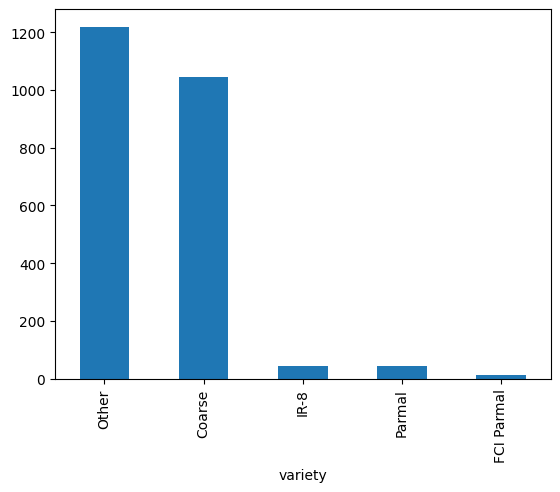

In [45]:
Gujarat['variety'].value_counts().plot(kind='bar')

<Axes: xlabel='market'>

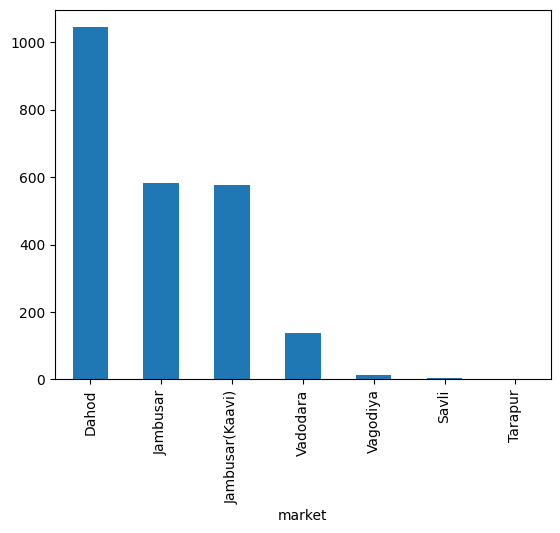

In [46]:
Gujarat['market'].value_counts().plot(kind='bar')

In [47]:
Gujarat['arrival_date'] = pd.to_datetime(Gujarat['arrival_date'], format='%d/%m/%Y')
Gujarat['arrival_date'] = Gujarat['arrival_date'].dt.strftime('%Y-%m')
Gujarat.head()

<ipython-input-47-9e516d7fd02e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Gujarat['arrival_date'] = pd.to_datetime(Gujarat['arrival_date'], format='%d/%m/%Y')
<ipython-input-47-9e516d7fd02e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Gujarat['arrival_date'] = Gujarat['arrival_date'].dt.strftime('%Y-%m')


,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price,cost of cultivation,Yield (kg/ha)
1191,Gujarat,Bharuch,Jambusar,Rice,Other,2019-01,2800.0,3200.0,3000.0,24513,1356
1192,Gujarat,Bharuch,Jambusar,Rice,Other,2019-01,2800.0,3200.0,3000.0,24513,1356
1193,Gujarat,Bharuch,Jambusar,Rice,Other,2019-01,2800.0,3400.0,3100.0,24513,1356
1194,Gujarat,Bharuch,Jambusar,Rice,Other,2019-01,2800.0,3200.0,3000.0,24513,1356
1195,Gujarat,Bharuch,Jambusar,Rice,Other,2019-01,2800.0,3200.0,3000.0,24513,1356


In [48]:
len(Gujarat['arrival_date'].unique())

50

In [49]:
# @title Default title text
d1=Gujarat[Gujarat['arrival_date']=='2020-01']

In [50]:
d1=Gujarat[Gujarat['arrival_date']=='2020-01']
d2=Gujarat[Gujarat['arrival_date']=='2020-02']
d3=Gujarat[Gujarat['arrival_date']=='2020-03']
d4=Gujarat[Gujarat['arrival_date']=='2020-04']
d5=Gujarat[Gujarat['arrival_date']=='2020-05']
d6=Gujarat[Gujarat['arrival_date']=='2020-06']
d6=Gujarat[Gujarat['arrival_date']=='2020-07']
d8=Gujarat[Gujarat['arrival_date']=='2020-08']
d9=Gujarat[Gujarat['arrival_date']=='2020-09']



In [51]:
d2=Gujarat[Gujarat['arrival_date']=='2020-02']

In [52]:
d3=Gujarat[Gujarat['arrival_date']=='2020-03']

In [53]:
d4=Gujarat[Gujarat['arrival_date']=='2020-04']

In [54]:
d5=Gujarat[Gujarat['arrival_date']=='2020-05']

In [55]:
d6=Gujarat[Gujarat['arrival_date']=='2020-06']

In [56]:
d7=Gujarat[Gujarat['arrival_date']=='2020-07']

In [57]:
d8=Gujarat[Gujarat['arrival_date']=='2020-08']

In [58]:
d9=Gujarat[Gujarat['arrival_date']=='2020-09']


In [59]:
Gujarat_2020=pd.concat([d1,d2,d3,d4,d5,d6,d7,d8,d9])
Gujarat_2020.head()

,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price,cost of cultivation,Yield (kg/ha)
38,Gujarat,Dahod,Dahod,Rice,Coarse,2020-01,3800.0,4200.0,4000.0,24513,1356
39,Gujarat,Dahod,Dahod,Rice,Coarse,2020-01,3800.0,4200.0,4000.0,24513,1356
40,Gujarat,Dahod,Dahod,Rice,Coarse,2020-01,3800.0,4200.0,4000.0,24513,1356
41,Gujarat,Dahod,Dahod,Rice,Coarse,2020-01,3800.0,4200.0,4000.0,24513,1356
42,Gujarat,Dahod,Dahod,Rice,Coarse,2020-01,3800.0,4200.0,4000.0,24513,1356


<ipython-input-60-90471f26d7e7>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='arrival_date', y='max_price', data=Gujarat_2020, palette='rainbow')


<Axes: xlabel='arrival_date', ylabel='max_price'>

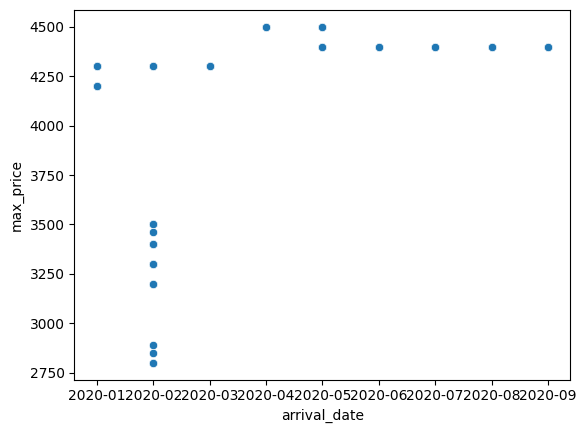

In [60]:
sns.scatterplot(x='arrival_date', y='max_price', data=Gujarat_2020, palette='rainbow')

<ipython-input-61-ed3276d0a775>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='arrival_date', y='min_price', data=Gujarat_2020, palette='rainbow')


<Axes: xlabel='arrival_date', ylabel='min_price'>

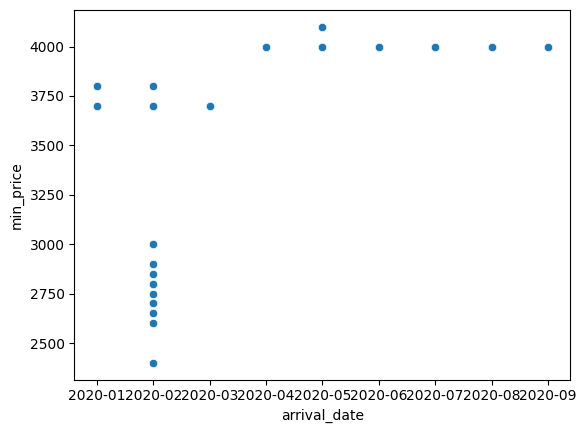

In [61]:
sns.scatterplot(x='arrival_date', y='min_price', data=Gujarat_2020, palette='rainbow')

<ipython-input-62-0ac77cccd6ab>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='arrival_date', y='modal_price', data=Gujarat_2020, palette='rainbow')


<Axes: xlabel='arrival_date', ylabel='modal_price'>

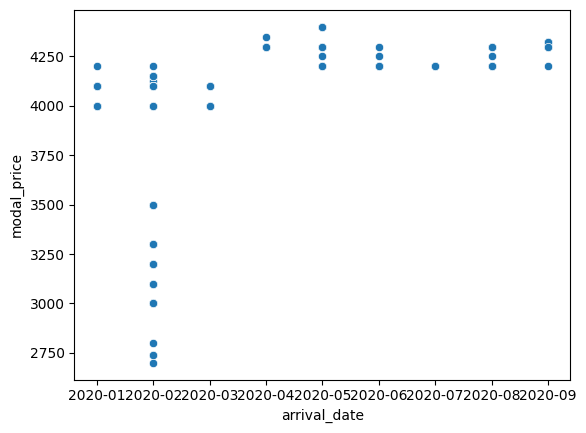

In [62]:
sns.scatterplot(x='arrival_date', y='modal_price', data=Gujarat_2020, palette='rainbow')

In [63]:
d11=Gujarat[Gujarat['arrival_date']=='2021-01']

In [64]:
d12=Gujarat[Gujarat['arrival_date']=='2021-02']

In [65]:
d13=Gujarat[Gujarat['arrival_date']=='2021-03']

In [66]:
d14=Gujarat[Gujarat['arrival_date']=='2021-04']

In [67]:
d15=Gujarat[Gujarat['arrival_date']=='2021-05']

In [68]:
d16=Gujarat[Gujarat['arrival_date']=='2021-06']

In [69]:
d17=Gujarat[Gujarat['arrival_date']=='2021-07']

In [70]:
d18=Gujarat[Gujarat['arrival_date']=='2021-08']

In [71]:
d19=Gujarat[Gujarat['arrival_date']=='2021-09']

In [72]:
d20=Gujarat[Gujarat['arrival_date']=='2021-10']

In [73]:
d21=Gujarat[Gujarat['arrival_date']=='2021-11']

In [74]:
d22=Gujarat[Gujarat['arrival_date']=='2021-12']

In [75]:
Gujarat_2021=pd.concat([d11,d12,d13,d14,d15,d16,d17,d18,d19,d20,d21,d22])
Gujarat_2021.head()

,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price,cost of cultivation,Yield (kg/ha)
0,Gujarat,Dahod,Dahod,Rice,Coarse,2021-01,4000.0,4500.0,4400.0,24513,1356
1,Gujarat,Dahod,Dahod,Rice,Coarse,2021-01,3900.0,4400.0,4300.0,24513,1356
2,Gujarat,Dahod,Dahod,Rice,Coarse,2021-01,3900.0,4400.0,4300.0,24513,1356
3,Gujarat,Dahod,Dahod,Rice,Coarse,2021-01,3900.0,4400.0,4300.0,24513,1356
4,Gujarat,Dahod,Dahod,Rice,Coarse,2021-01,3900.0,4400.0,4300.0,24513,1356


<ipython-input-76-1dd9840b9253>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='arrival_date', y='max_price', data=Gujarat_2021, palette='rainbow')


<Axes: xlabel='arrival_date', ylabel='max_price'>

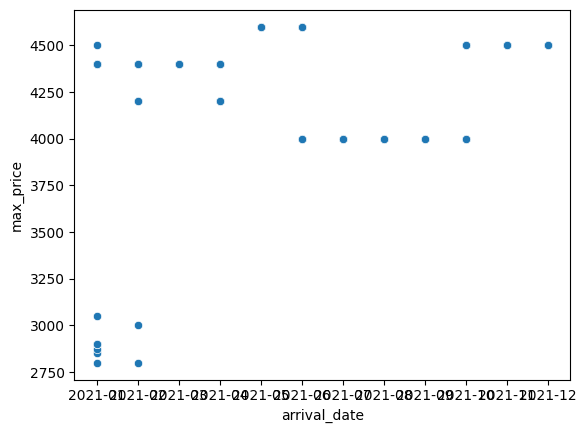

In [76]:
sns.scatterplot(x='arrival_date', y='max_price', data=Gujarat_2021, palette='rainbow')

<ipython-input-77-541e9c453a53>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='arrival_date', y='min_price', data=Gujarat_2021, palette='rainbow')


<Axes: xlabel='arrival_date', ylabel='min_price'>

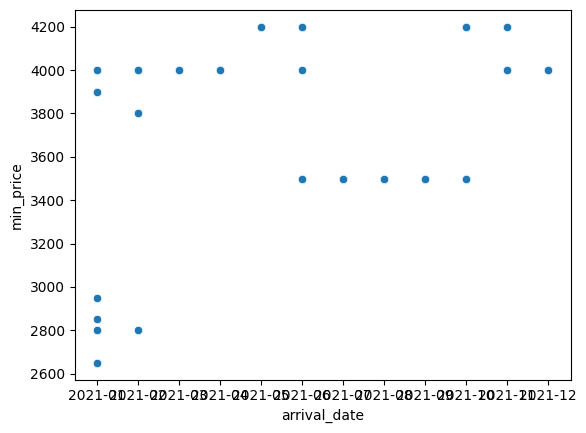

In [77]:
sns.scatterplot(x='arrival_date', y='min_price', data=Gujarat_2021, palette='rainbow')

<ipython-input-78-3aeabe3eb26e>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='arrival_date', y='modal_price', data=Gujarat_2021, palette='rainbow')


<Axes: xlabel='arrival_date', ylabel='modal_price'>

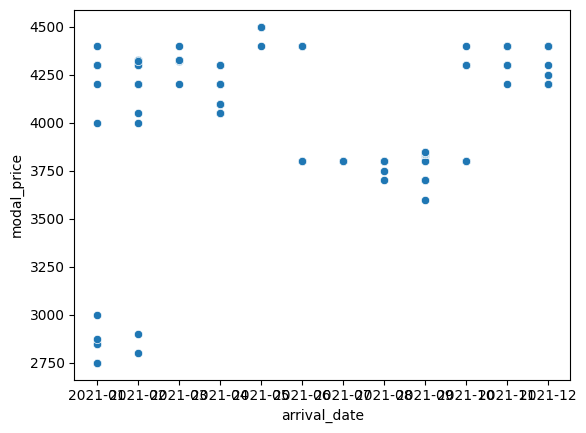

In [78]:
sns.scatterplot(x='arrival_date', y='modal_price', data=Gujarat_2021, palette='rainbow')

In [79]:
d23=Gujarat[Gujarat['arrival_date']=='2022-01']

In [80]:
d24=Gujarat[Gujarat['arrival_date']=='2022-02']

In [81]:
d25=Gujarat[Gujarat['arrival_date']=='2022-03']

In [82]:
d26=Gujarat[Gujarat['arrival_date']=='2022-04']

In [83]:
d27=Gujarat[Gujarat['arrival_date']=='2022-05']

In [84]:
d28=Gujarat[Gujarat['arrival_date']=='2022-06']

In [85]:
d29=Gujarat[Gujarat['arrival_date']=='2022-07']

In [86]:
d30=Gujarat[Gujarat['arrival_date']=='2022-08']

In [87]:
d31=Gujarat[Gujarat['arrival_date']=='2022-09']

In [88]:
d32=Gujarat[Gujarat['arrival_date']=='2022-10']

In [89]:
d33=Gujarat[Gujarat['arrival_date']=='2022-11']

In [90]:
d34=Gujarat[Gujarat['arrival_date']=='2022-12']

In [91]:
Gujarat_2022=pd.concat([d23,d24,d25,d26,d27,d28,d29,d30,d31,d32,d33,d34])
Gujarat_2022.head()

,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price,cost of cultivation,Yield (kg/ha)
710,Gujarat,Bharuch,Jambusar,Rice,Other,2022-01,2700.0,3400.0,3000.0,24513,1356
711,Gujarat,Bharuch,Jambusar,Rice,Other,2022-01,2800.0,3400.0,3200.0,24513,1356
712,Gujarat,Bharuch,Jambusar,Rice,Other,2022-01,2700.0,3400.0,3000.0,24513,1356
713,Gujarat,Bharuch,Jambusar,Rice,Other,2022-01,3000.0,3600.0,3300.0,24513,1356
714,Gujarat,Bharuch,Jambusar,Rice,Other,2022-01,2800.0,3500.0,3000.0,24513,1356


<ipython-input-92-cfead4897b08>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='arrival_date', y='min_price', data=Gujarat_2022, palette='rainbow')


<Axes: xlabel='arrival_date', ylabel='min_price'>

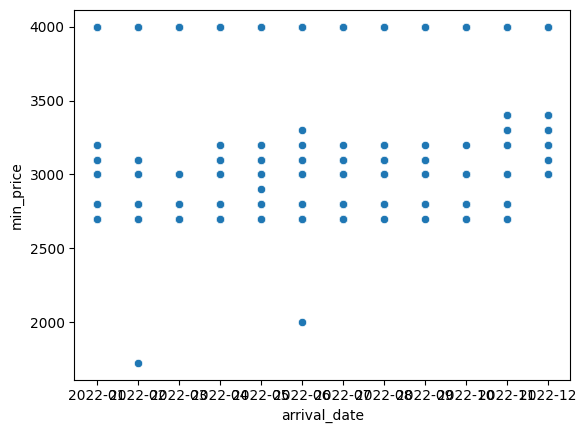

In [92]:
sns.scatterplot(x='arrival_date', y='min_price', data=Gujarat_2022, palette='rainbow')

<ipython-input-93-6b3aa0c7c8c4>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='arrival_date', y='max_price', data=Gujarat_2022, palette='rainbow')


<Axes: xlabel='arrival_date', ylabel='max_price'>

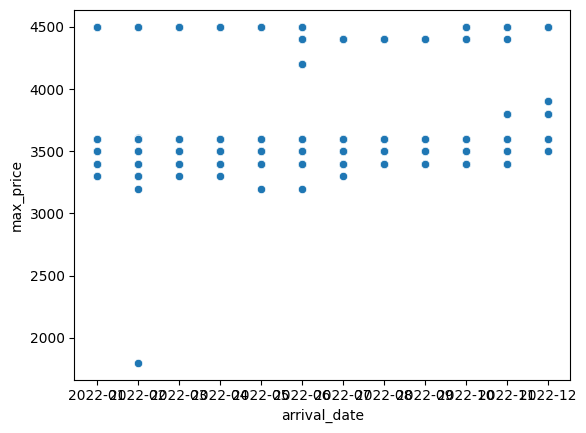

In [93]:
sns.scatterplot(x='arrival_date', y='max_price', data=Gujarat_2022, palette='rainbow')

<ipython-input-94-f8d02e312452>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='arrival_date', y='modal_price', data=Gujarat_2022, palette='rainbow')


<Axes: xlabel='arrival_date', ylabel='modal_price'>

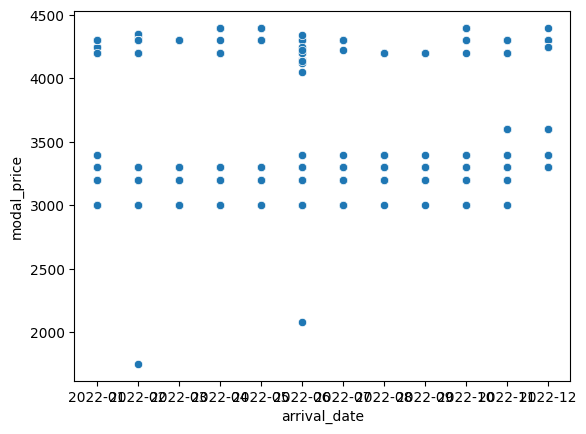

In [94]:
sns.scatterplot(x='arrival_date', y='modal_price', data=Gujarat_2022, palette='rainbow')

In [95]:
d35=Gujarat[Gujarat['arrival_date']=='2023-01']

In [96]:
d36=Gujarat[Gujarat['arrival_date']=='2023-02']

In [97]:
d37=Gujarat[Gujarat['arrival_date']=='2023-03']

In [98]:
d38=Gujarat[Gujarat['arrival_date']=='2023-04']

In [99]:
d39=Gujarat[Gujarat['arrival_date']=='2023-05']

In [100]:
d40=Gujarat[Gujarat['arrival_date']=='2023-06']

In [101]:
d41=Gujarat[Gujarat['arrival_date']=='2023-07']

In [102]:
d42=Gujarat[Gujarat['arrival_date']=='2023-08']

In [103]:
d43=Gujarat[Gujarat['arrival_date']=='2023-09']

In [104]:
d44=Gujarat[Gujarat['arrival_date']=='2023-10']

In [105]:
d45=Gujarat[Gujarat['arrival_date']=='2023-11']

In [106]:
d46=Gujarat[Gujarat['arrival_date']=='2023-12']

In [107]:
Gujarat_2023=pd.concat([d35,d36,d37,d38,d39,d40,d41,d42,d43,d44,d45,d46])

<ipython-input-108-c670d3824576>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='arrival_date', y='min_price', data=Gujarat_2023, palette='rainbow')


<Axes: xlabel='arrival_date', ylabel='min_price'>

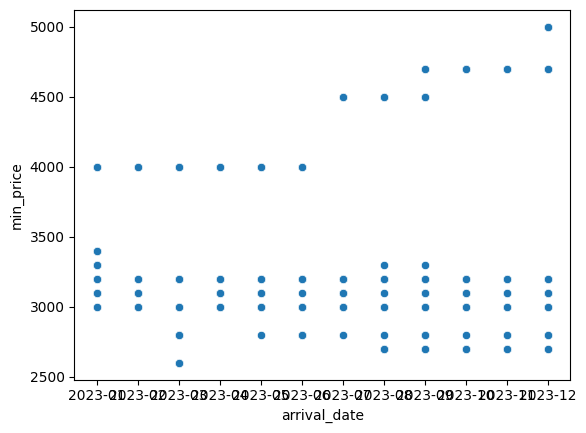

In [108]:
sns.scatterplot(x='arrival_date', y='min_price', data=Gujarat_2023, palette='rainbow')

<ipython-input-109-8908c0ac8adf>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='arrival_date', y='max_price', data=Gujarat_2023, palette='rainbow')


<Axes: xlabel='arrival_date', ylabel='max_price'>

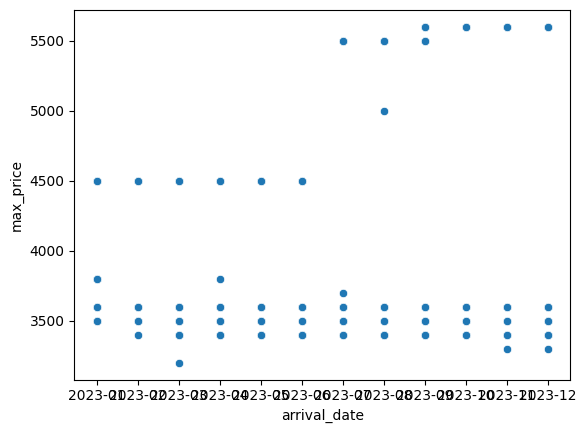

In [109]:
sns.scatterplot(x='arrival_date', y='max_price', data=Gujarat_2023, palette='rainbow')

<ipython-input-110-22ab765cfae5>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='arrival_date', y='modal_price', data=Gujarat_2023, palette='rainbow')


<Axes: xlabel='arrival_date', ylabel='modal_price'>

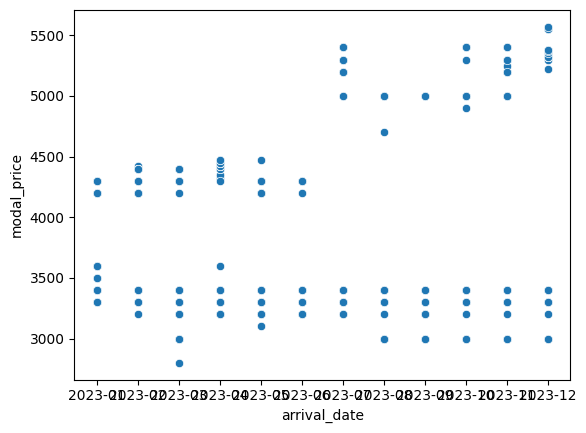

In [110]:
sns.scatterplot(x='arrival_date', y='modal_price', data=Gujarat_2023, palette='rainbow')

In [111]:
d47=Gujarat[Gujarat['arrival_date']=='2024-01']

In [112]:
d48=Gujarat[Gujarat['arrival_date']=='2024-02']

In [113]:
d49=Gujarat[Gujarat['arrival_date']=='2024-03']

In [114]:
Gujarat_2024=pd.concat([d47,d48,d49])

<ipython-input-115-9f29b0d86f32>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='arrival_date', y='min_price', data=Gujarat_2024, palette='rainbow')


<Axes: xlabel='arrival_date', ylabel='min_price'>

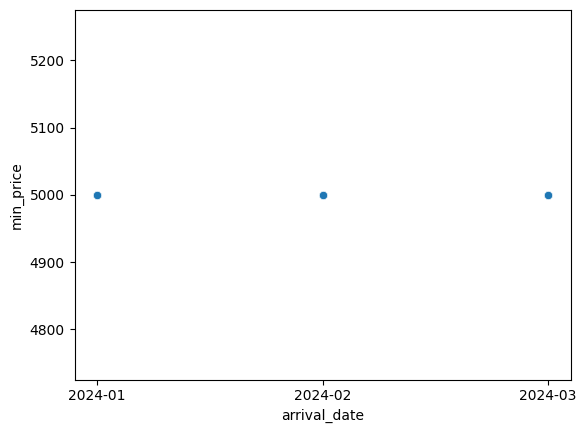

In [115]:
sns.scatterplot(x='arrival_date', y='min_price', data=Gujarat_2024, palette='rainbow')

<ipython-input-116-358f71d5c466>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='arrival_date', y='max_price', data=Gujarat_2024, palette='rainbow')


<Axes: xlabel='arrival_date', ylabel='max_price'>

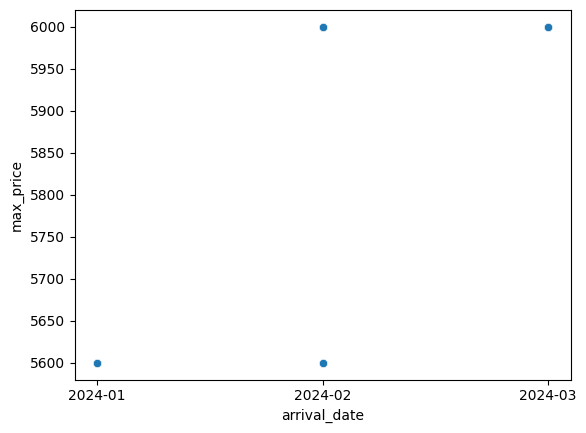

In [116]:
sns.scatterplot(x='arrival_date', y='max_price', data=Gujarat_2024, palette='rainbow')

<ipython-input-117-7feab5ea969b>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='arrival_date', y='modal_price', data=Gujarat_2024, palette='rainbow')


<Axes: xlabel='arrival_date', ylabel='modal_price'>

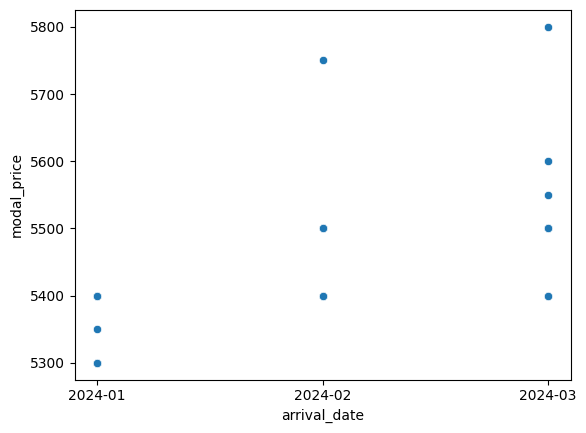

In [117]:
sns.scatterplot(x='arrival_date', y='modal_price', data=Gujarat_2024, palette='rainbow')

In [118]:
West_Bengal=Rice[Rice['state']=='West Bengal']
West_Bengal.head()

,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price,cost of cultivation,Yield (kg/ha)
11751,West Bengal,Bankura,Bankura Sadar,Rice,Common,05/01/2019,2400.0,2500.0,2450.0,34428,2600
11752,West Bengal,Bankura,Bankura Sadar,Rice,Common,06/01/2019,2450.0,2550.0,2500.0,34428,2600
11753,West Bengal,Bankura,Bankura Sadar,Rice,Common,07/01/2019,2450.0,2550.0,2500.0,34428,2600
11754,West Bengal,Bankura,Bankura Sadar,Rice,Common,08/01/2019,2400.0,2550.0,2500.0,34428,2600
11755,West Bengal,Bankura,Bankura Sadar,Rice,Common,09/01/2019,2400.0,2550.0,2500.0,34428,2600


<Axes: xlabel='variety'>

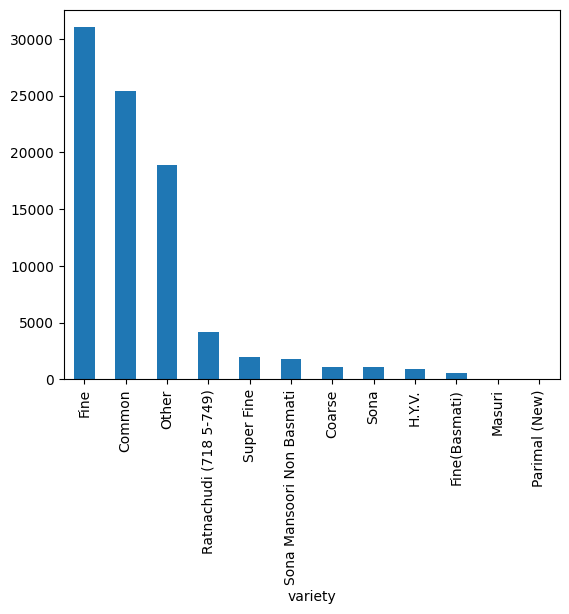

In [119]:
West_Bengal['variety'].value_counts().plot(kind='bar')

<Axes: xlabel='market'>

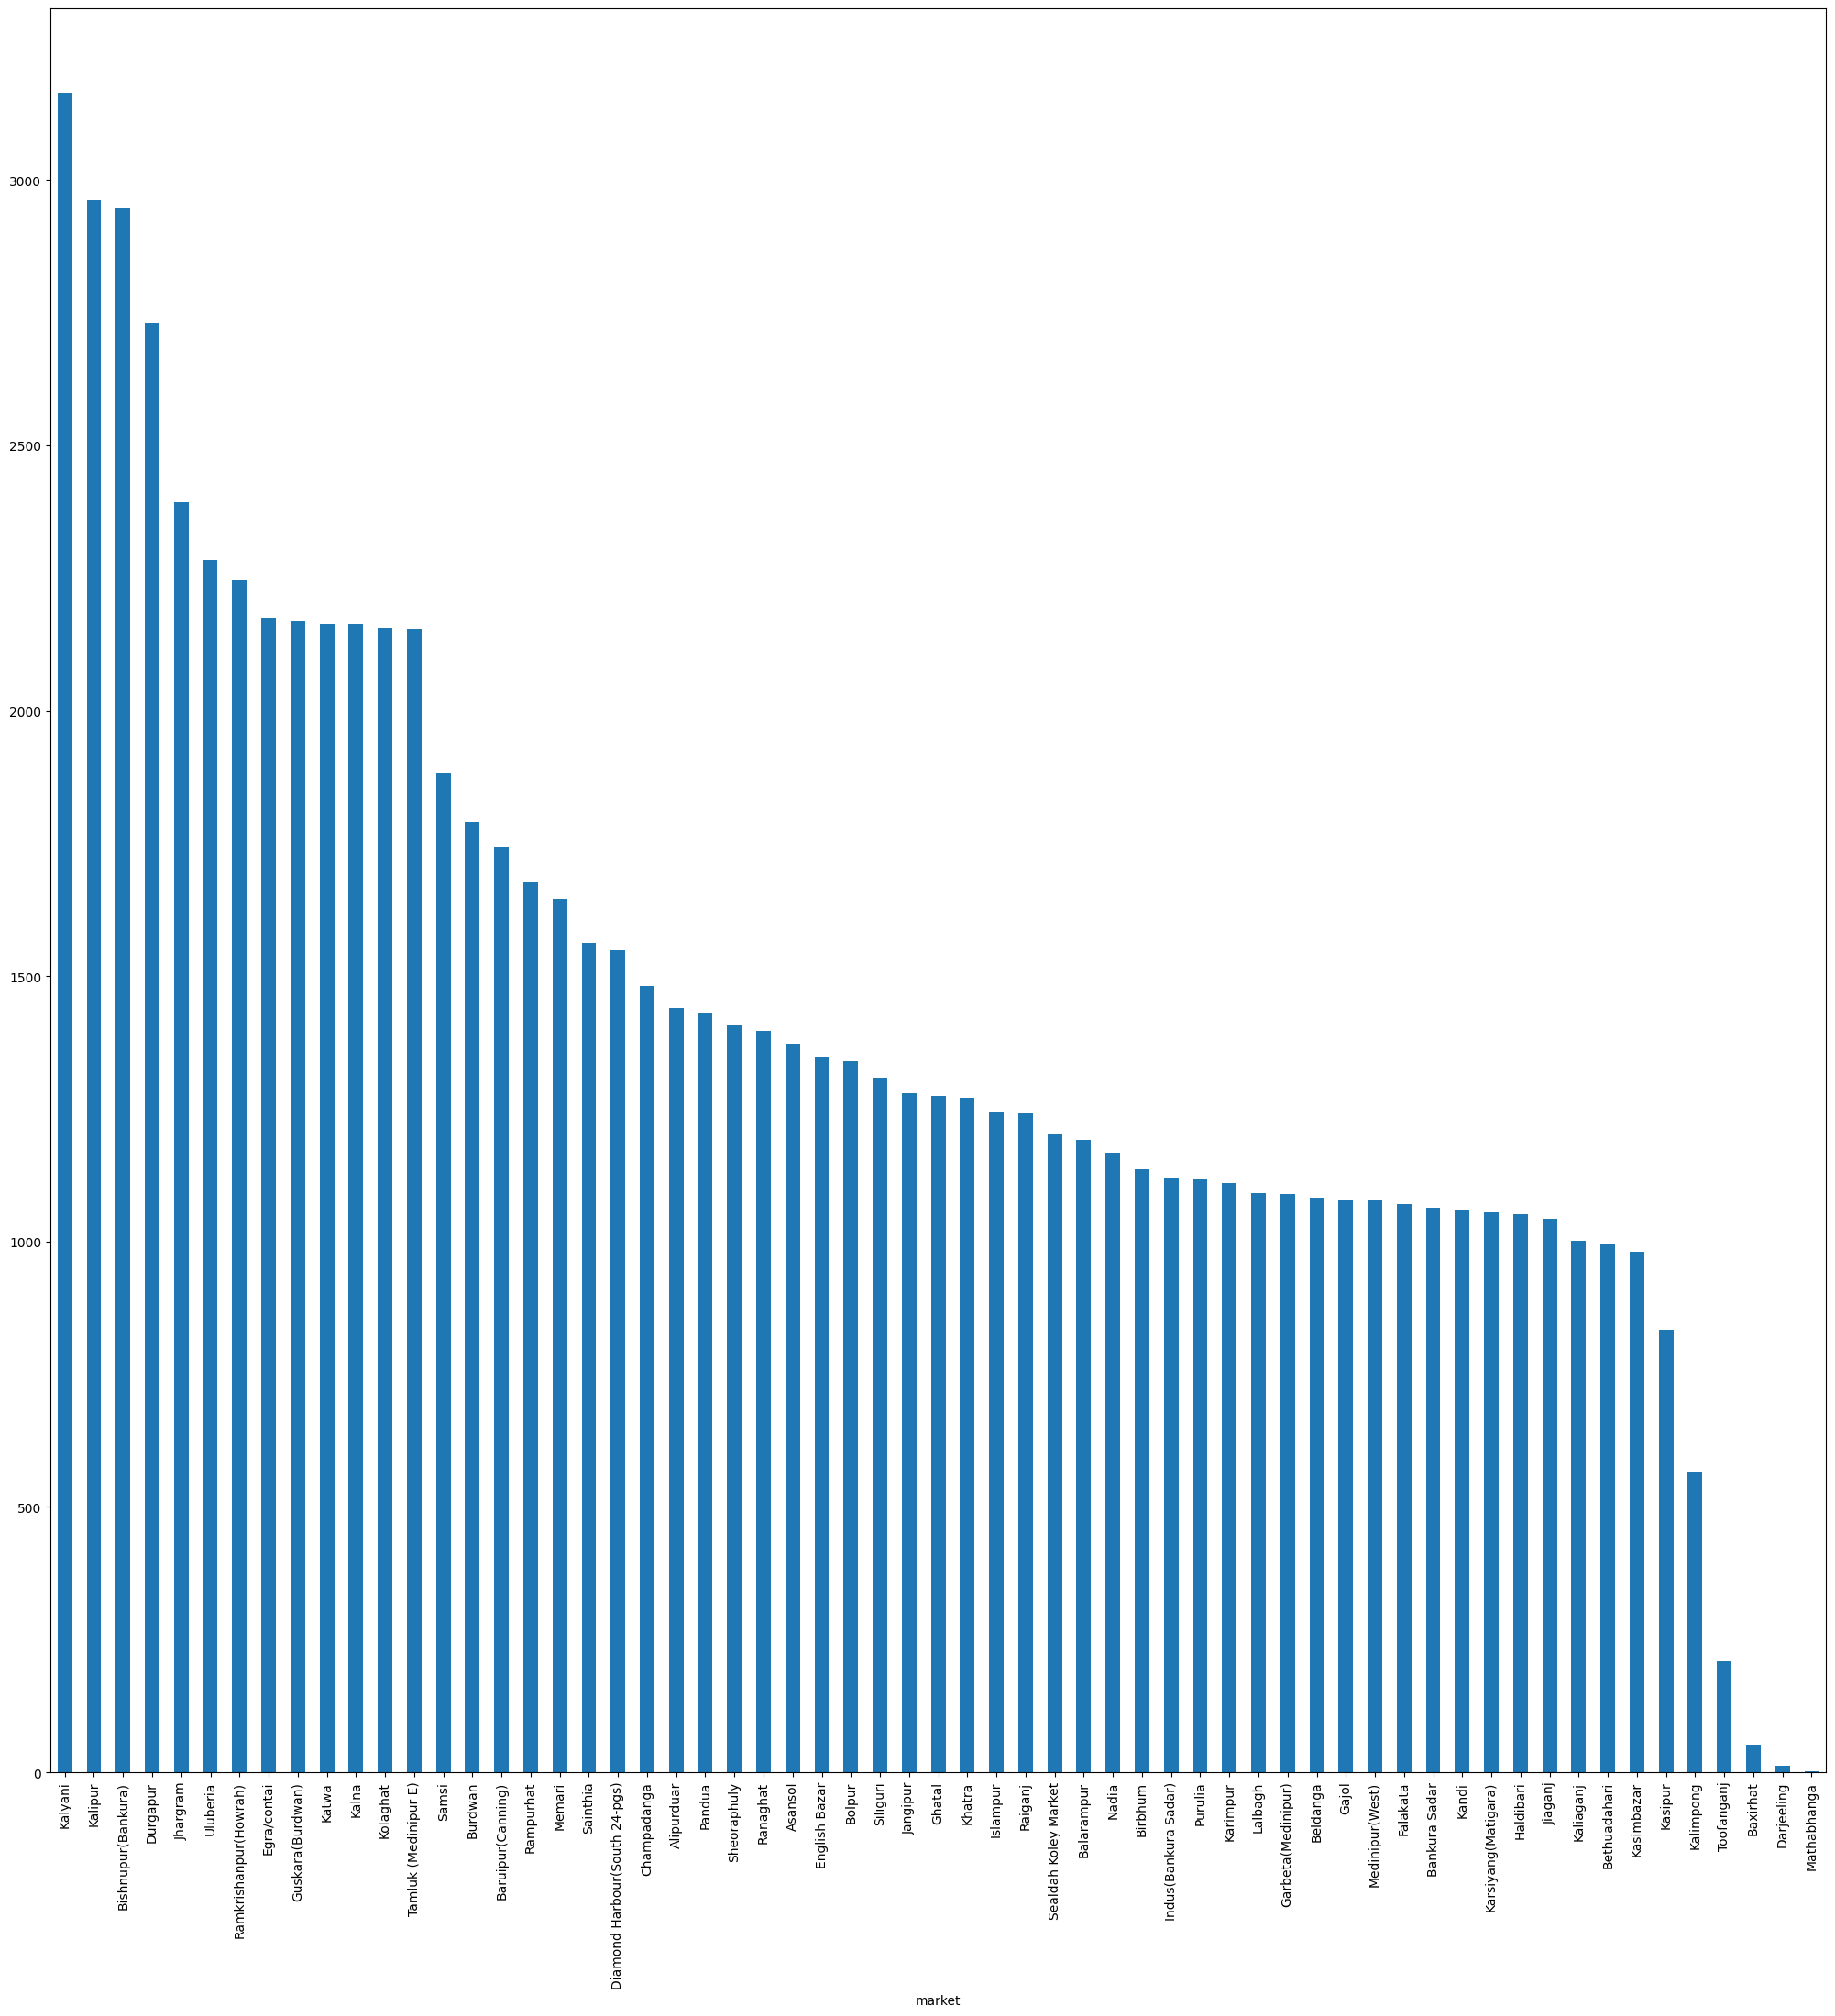

In [120]:
West_Bengal['market'].value_counts().plot(kind='bar',figsize=(25,25))

<Axes: xlabel='count', ylabel='market'>

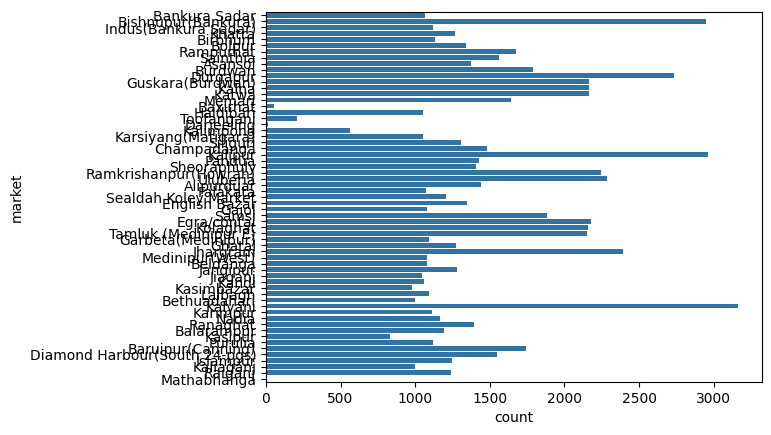

In [121]:
sns.countplot(West_Bengal['market'])

In [122]:
w1=West_Bengal[West_Bengal['arrival_date']=='2019-01']
w2=West_Bengal[West_Bengal['arrival_date']=='2019-02']
w3=West_Bengal[West_Bengal['arrival_date']=='2019-03']
w4=West_Bengal[West_Bengal['arrival_date']=='2019-04']
w5=West_Bengal[West_Bengal['arrival_date']=='2019-05']
w6=West_Bengal[West_Bengal['arrival_date']=='2019-06']
w7=West_Bengal[West_Bengal['arrival_date']=='2019-07']
w8=West_Bengal[West_Bengal['arrival_date']=='2019-08']
w9=West_Bengal[West_Bengal['arrival_date']=='2019-09']
w10=West_Bengal[West_Bengal['arrival_date']=="2019-10"]
w11=West_Bengal[West_Bengal['arrival_date']=="2019-11"]
w12=West_Bengal[West_Bengal['arrival_date']=="2019-12"]
w1


,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price,cost of cultivation,Yield (kg/ha)


In [123]:
West_Bengal_2019=pd.concat([w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,w11,w12])
West_Bengal_2019.head()

,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price,cost of cultivation,Yield (kg/ha)


In [124]:
w1=West_Bengal[West_Bengal['arrival_date']=='2019-01']
w2=West_Bengal[West_Bengal['arrival_date']=='2019-02']
w3=West_Bengal[West_Bengal['arrival_date']=='2019-03']
w4=West_Bengal[West_Bengal['arrival_date']=='2019-04']
w5=West_Bengal[West_Bengal['arrival_date']=='2019-05']
w6=West_Bengal[West_Bengal['arrival_date']=='2019-06']
w7=West_Bengal[West_Bengal['arrival_date']=='2019-07']
w8=West_Bengal[West_Bengal['arrival_date']=='2019-08']
w9=West_Bengal[West_Bengal['arrival_date']=='2019-09']
w10=West_Bengal[West_Bengal['arrival_date']=="2019-10"]
w11=West_Bengal[West_Bengal['arrival_date']=="2019-11"]
w12=West_Bengal[West_Bengal['arrival_date']=="2019-12"]
w1

,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price,cost of cultivation,Yield (kg/ha)


In [125]:
# prompt:  prompt: crreate a data frame with westbengal state and remove date  and remain with only month and year

import pandas as pd
West_Bengal['arrival_date'] = pd.to_datetime(West_Bengal['arrival_date'], format='%d/%m/%Y')
West_Bengal['date'] = West_Bengal['arrival_date'].dt.strftime('%Y-%m')
West_Bengal.head()


<ipython-input-125-7683a31b4a87>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  West_Bengal['arrival_date'] = pd.to_datetime(West_Bengal['arrival_date'], format='%d/%m/%Y')
<ipython-input-125-7683a31b4a87>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  West_Bengal['date'] = West_Bengal['arrival_date'].dt.strftime('%Y-%m')


,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price,cost of cultivation,Yield (kg/ha),date
11751,West Bengal,Bankura,Bankura Sadar,Rice,Common,2019-01-05,2400.0,2500.0,2450.0,34428,2600,2019-01
11752,West Bengal,Bankura,Bankura Sadar,Rice,Common,2019-01-06,2450.0,2550.0,2500.0,34428,2600,2019-01
11753,West Bengal,Bankura,Bankura Sadar,Rice,Common,2019-01-07,2450.0,2550.0,2500.0,34428,2600,2019-01
11754,West Bengal,Bankura,Bankura Sadar,Rice,Common,2019-01-08,2400.0,2550.0,2500.0,34428,2600,2019-01
11755,West Bengal,Bankura,Bankura Sadar,Rice,Common,2019-01-09,2400.0,2550.0,2500.0,34428,2600,2019-01


In [126]:
w1=West_Bengal[West_Bengal['arrival_date']=='2019-01']
w2=West_Bengal[West_Bengal['arrival_date']=='2019-02']
w3=West_Bengal[West_Bengal['arrival_date']=='2019-03']
w4=West_Bengal[West_Bengal['arrival_date']=='2019-04']
w5=West_Bengal[West_Bengal['arrival_date']=='2019-05']
w6=West_Bengal[West_Bengal['arrival_date']=='2019-06']
w7=West_Bengal[West_Bengal['arrival_date']=='2019-07']
w8=West_Bengal[West_Bengal['arrival_date']=='2019-08']
w9=West_Bengal[West_Bengal['arrival_date']=='2019-09']
w10=West_Bengal[West_Bengal['arrival_date']=="2019-10"]
w11=West_Bengal[West_Bengal['arrival_date']=="2019-11"]
w12=West_Bengal[West_Bengal['arrival_date']=="2019-12"]
w1

,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price,cost of cultivation,Yield (kg/ha),date
11773,West Bengal,Bankura,Bishnupur(Bankura),Rice,Common,2019-01-01,2600.0,2700.0,2650.0,34428,2600,2019-01
11829,West Bengal,Bankura,Bishnupur(Bankura),Rice,Fine,2019-01-01,2800.0,2900.0,2850.0,34428,2600,2019-01
11885,West Bengal,Bankura,Indus(Bankura Sadar),Rice,Fine,2019-01-01,2700.0,2800.0,2750.0,34428,2600,2019-01
11930,West Bengal,Bankura,Khatra,Rice,Common,2019-01-01,2600.0,2700.0,2650.0,34428,2600,2019-01
11978,West Bengal,Birbhum,Birbhum,Rice,Common,2019-01-01,2380.0,2420.0,2400.0,34428,2600,2019-01
...,...,...,...,...,...,...,...,...,...,...,...,...
15313,West Bengal,Sounth 24 Parganas,Diamond Harbour(South 24-pgs),Rice,Common,2019-01-01,2450.0,2550.0,2500.0,34428,2600,2019-01
15357,West Bengal,Sounth 24 Parganas,Diamond Harbour(South 24-pgs),Rice,Super Fine,2019-01-01,4050.0,4150.0,4100.0,34428,2600,2019-01
15401,West Bengal,Uttar Dinajpur,Islampur,Rice,Other,2019-01-01,3400.0,3500.0,3450.0,34428,2600,2019-01
15458,West Bengal,Uttar Dinajpur,Kaliaganj,Rice,Other,2019-01-01,3300.0,3400.0,3350.0,34428,2600,2019-01


In [127]:
West_Bengal_2019=pd.concat([w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,w11,w12])
West_Bengal_2019.head()

,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price,cost of cultivation,Yield (kg/ha),date
11773,West Bengal,Bankura,Bishnupur(Bankura),Rice,Common,2019-01-01,2600.0,2700.0,2650.0,34428,2600,2019-01
11829,West Bengal,Bankura,Bishnupur(Bankura),Rice,Fine,2019-01-01,2800.0,2900.0,2850.0,34428,2600,2019-01
11885,West Bengal,Bankura,Indus(Bankura Sadar),Rice,Fine,2019-01-01,2700.0,2800.0,2750.0,34428,2600,2019-01
11930,West Bengal,Bankura,Khatra,Rice,Common,2019-01-01,2600.0,2700.0,2650.0,34428,2600,2019-01
11978,West Bengal,Birbhum,Birbhum,Rice,Common,2019-01-01,2380.0,2420.0,2400.0,34428,2600,2019-01


In [128]:
# prompt: genrate westbengal data frame now with seprate 2020 data

import pandas as pd
w13=West_Bengal[West_Bengal['arrival_date']=='2020-01']
w14=West_Bengal[West_Bengal['arrival_date']=='2020-02']
w15=West_Bengal[West_Bengal['arrival_date']=='2020-03']
w16=West_Bengal[West_Bengal['arrival_date']=='2020-04']
w17=West_Bengal[West_Bengal['arrival_date']=='2020-05']
w18=West_Bengal[West_Bengal['arrival_date']=='2020-06']
w19=West_Bengal[West_Bengal['arrival_date']=='2020-07']
w20=West_Bengal[West_Bengal['arrival_date']=='2020-08']
w21=West_Bengal[West_Bengal['arrival_date']=='2020-09']
w22=West_Bengal[West_Bengal['arrival_date']=="2020-10"]
w23=West_Bengal[West_Bengal['arrival_date']=="2020-11"]
w24=West_Bengal[West_Bengal['arrival_date']=="2020-12"]

West_Bengal_2020=pd.concat([w13,w14,w15,w16,w17,w18,w19,w20,w21,w22,w23,w24])
West_Bengal_2020.head()


,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price,cost of cultivation,Yield (kg/ha),date
38201,West Bengal,Bankura,Bishnupur(Bankura),Rice,Common,2020-01-01,2550.0,2650.0,2600.0,34428,2600,2020-01
38455,West Bengal,Bankura,Bishnupur(Bankura),Rice,Fine,2020-01-01,2750.0,2850.0,2800.0,34428,2600,2020-01
38862,West Bengal,Bankura,Khatra,Rice,Common,2020-01-01,2600.0,2700.0,2650.0,34428,2600,2020-01
40013,West Bengal,Burdwan,Asansol,Rice,Fine,2020-01-01,2800.0,2860.0,2820.0,34428,2600,2020-01
40466,West Bengal,Burdwan,Durgapur,Rice,Fine,2020-01-01,2700.0,2760.0,2720.0,34428,2600,2020-01


In [129]:
# prompt: now with 2021

import pandas as pd
w25=West_Bengal[West_Bengal['arrival_date']=='2021-01']
w26=West_Bengal[West_Bengal['arrival_date']=='2021-02']
w27=West_Bengal[West_Bengal['arrival_date']=='2021-03']
w28=West_Bengal[West_Bengal['arrival_date']=='2021-04']
w29=West_Bengal[West_Bengal['arrival_date']=='2021-05']
w30=West_Bengal[West_Bengal['arrival_date']=='2021-06']
w31=West_Bengal[West_Bengal['arrival_date']=='2021-07']
w32=West_Bengal[West_Bengal['arrival_date']=='2021-08']
w33=West_Bengal[West_Bengal['arrival_date']=='2021-09']
w34=West_Bengal[West_Bengal['arrival_date']=="2021-10"]
w35=West_Bengal[West_Bengal['arrival_date']=="2021-11"]
w36=West_Bengal[West_Bengal['arrival_date']=="2021-12"]
West_Bengal_2021=pd.concat([w25,w26,w27,w28,w29,w30,w31,w32,w33,w34,w35,w36])
West_Bengal_2021.head()


,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price,cost of cultivation,Yield (kg/ha),date
47770,West Bengal,Bankura,Bishnupur(Bankura),Rice,Common,2021-01-01,2550.0,2650.0,2600.0,34428,2600,2021-01
48131,West Bengal,Bankura,Bishnupur(Bankura),Rice,Fine,2021-01-01,2750.0,2900.0,2800.0,34428,2600,2021-01
48754,West Bengal,Bankura,Khatra,Rice,Common,2021-01-01,2550.0,2650.0,2600.0,34428,2600,2021-01
50537,West Bengal,Burdwan,Burdwan,Rice,Common,2021-01-01,1950.0,2050.0,2000.0,34428,2600,2021-01
50831,West Bengal,Burdwan,Burdwan,Rice,Fine,2021-01-01,2450.0,2550.0,2500.0,34428,2600,2021-01


In [130]:
# prompt: now with 2022

import pandas as pd
w37=West_Bengal[West_Bengal['arrival_date']=='2022-01']
w38=West_Bengal[West_Bengal['arrival_date']=='2022-02']
w39=West_Bengal[West_Bengal['arrival_date']=='2022-03']
w40=West_Bengal[West_Bengal['arrival_date']=='2022-04']
w41=West_Bengal[West_Bengal['arrival_date']=='2022-05']
w42=West_Bengal[West_Bengal['arrival_date']=='2022-06']
w43=West_Bengal[West_Bengal['arrival_date']=='2022-07']
w44=West_Bengal[West_Bengal['arrival_date']=='2022-08']
w45=West_Bengal[West_Bengal['arrival_date']=='2022-09']
w46=West_Bengal[West_Bengal['arrival_date']=="2022-10"]
w47=West_Bengal[West_Bengal['arrival_date']=="2022-11"]
w48=West_Bengal[West_Bengal['arrival_date']=="2022-12"]
West_Bengal_2022=pd.concat([w37,w38,w39,w40,w41,w42,w43,w44,w45,w46,w47,w48])
West_Bengal_2022.head()


,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price,cost of cultivation,Yield (kg/ha),date
53285,West Bengal,Bankura,Bankura Sadar,Rice,Common,2022-01-01,2400.0,2600.0,2500.0,34428,2600,2022-01
53550,West Bengal,Bankura,Bishnupur(Bankura),Rice,Common,2022-01-01,2700.0,2850.0,2800.0,34428,2600,2022-01
53910,West Bengal,Bankura,Bishnupur(Bankura),Rice,Fine,2022-01-01,3000.0,3200.0,3100.0,34428,2600,2022-01
54270,West Bengal,Bankura,Indus(Bankura Sadar),Rice,Fine,2022-01-01,3300.0,3800.0,3400.0,34428,2600,2022-01
54548,West Bengal,Bankura,Khatra,Rice,Common,2022-01-01,2700.0,2850.0,2800.0,34428,2600,2022-01


In [131]:
# prompt: now with 2023

import pandas as pd
w49=West_Bengal[West_Bengal['date']=='2023-01']
w50=West_Bengal[West_Bengal['date']=='2023-02']
w51=West_Bengal[West_Bengal['date']=='2023-03']
w52=West_Bengal[West_Bengal['date']=='2023-04']
w53=West_Bengal[West_Bengal['date']=='2023-05']
w54=West_Bengal[West_Bengal['date']=='2023-06']
w55=West_Bengal[West_Bengal['date']=='2023-07']
w56=West_Bengal[West_Bengal['date']=='2023-08']
w57=West_Bengal[West_Bengal['date']=='2023-09']
w58=West_Bengal[West_Bengal['date']=='2023-10']
w59=West_Bengal[West_Bengal['date']=='2023-11']
w60=West_Bengal[West_Bengal['date']=='2023-12']
West_Bengal_2023=pd.concat([w49,w50,w51,w52,w53,w54,w55,w56,w57,w58,w59,w60])


<ipython-input-137-2084071a9ec8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  West_Bengal['ds'] =West_Bengal.date
<ipython-input-137-2084071a9ec8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  West_Bengal['y'] = West_Bengal.modal_price
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_b6pyzmd/l9e2yk26.json
DEBU

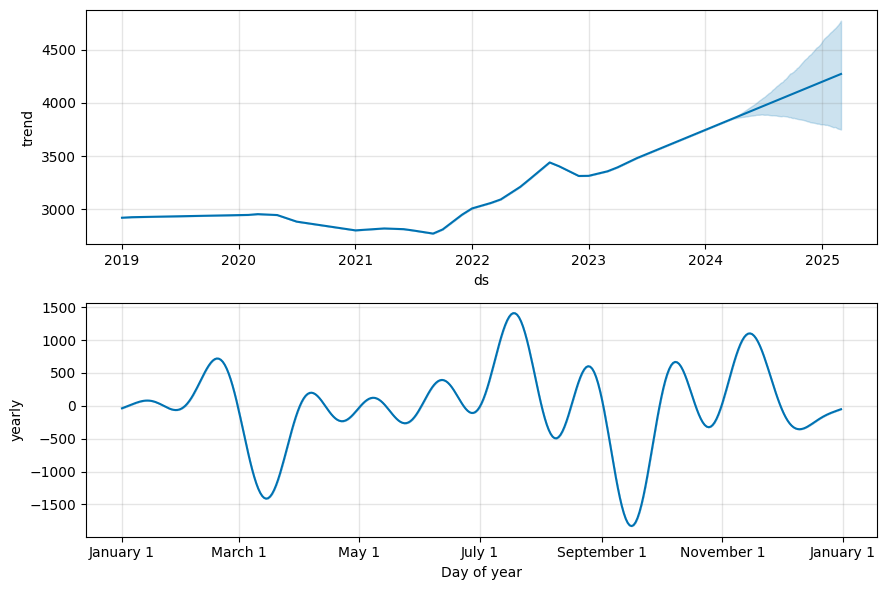

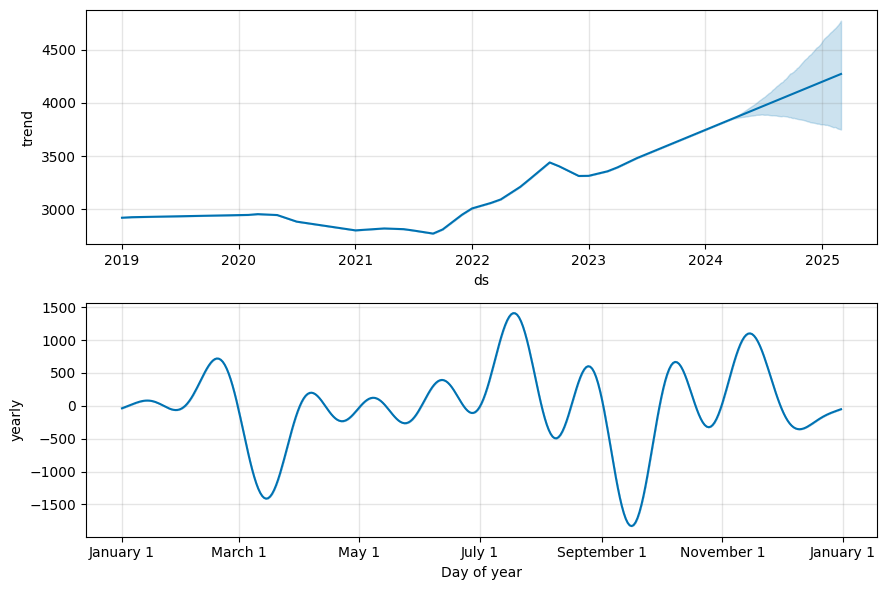

In [137]:
from prophet import Prophet
West_Bengal['ds'] =West_Bengal.date
West_Bengal['y'] = West_Bengal.modal_price
#daily_train.drop(['Count'],axis = 1, inplace = True)
#Fitting the prophet model:

m = Prophet(yearly_seasonality = True, seasonality_prior_scale=0.1)
m.fit(West_Bengal)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
#We can look at the various components using the following command:

m.plot_components(forecast)


# West_Bengal['y'] = West_Bengal.modal_price
# #daily_train.drop(['Count'],axis = 1, inplace = True)
# #Fitting the prophet model:

# m = Prophet(yearly_seasonality = True, seasonality_prior_scale=0.1)
# m.fit(West_Bengal)
# future = m.make_future_dataframe(periods=60)
# forecast = m.predict(future)
# #We can look at the various components using the following command:

# m.plot_components(forecast)https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

In [133]:
forecast
#
# Calculate R2 score
#rmse = np.sqrt(mse)

#print(f"R2 Score: {1 - mse / np.var(West_Bengal_2023['y']):.4f}")
# ['ds'] =West_Bengal.date

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-01-01,2993.997500,2489.622771,3981.091630,2993.997500,2993.997500,282.163540,282.163540,282.163540,282.163540,282.163540,282.163540,0.0,0.0,0.0,3276.161040
1,2023-02-01,3090.151179,2568.348883,4109.866377,3090.151179,3090.151179,274.969506,274.969506,274.969506,274.969506,274.969506,274.969506,0.0,0.0,0.0,3365.120686
2,2023-03-01,3176.999692,2594.922795,4099.350650,3176.999692,3176.999692,160.842182,160.842182,160.842182,160.842182,160.842182,160.842182,0.0,0.0,0.0,3337.841874
3,2023-04-01,3273.153190,2551.448646,4110.958643,3273.153190,3273.153190,64.925293,64.925293,64.925293,64.925293,64.925293,64.925293,0.0,0.0,0.0,3338.078483
4,2023-05-01,3366.205101,2615.240973,4139.527516,3366.205101,3366.205101,8.076073,8.076073,8.076073,8.076073,8.076073,8.076073,0.0,0.0,0.0,3374.281175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2024-01-26,4203.679243,3569.095456,5122.107510,4203.465761,4203.880164,180.954473,180.954473,180.954473,180.954473,180.954473,180.954473,0.0,0.0,0.0,4384.633716
68,2024-01-27,4206.780991,3635.790146,5178.858144,4206.560531,4206.990534,198.828065,198.828065,198.828065,198.828065,198.828065,198.828065,0.0,0.0,0.0,4405.609057
69,2024-01-28,4209.882740,3635.496814,5189.179745,4209.654037,4210.099709,216.153687,216.153687,216.153687,216.153687,216.153687,216.153687,0.0,0.0,0.0,4426.036427
70,2024-01-29,4212.984489,3673.102871,5190.187653,4212.749473,4213.207451,232.523326,232.523326,232.523326,232.523326,232.523326,232.523326,0.0,0.0,0.0,4445.507814


In [144]:
# Fit the Prophet model using all available data


# Make predictions for the entire date range
future = m.make_future_dataframe(periods=len(West_Bengal))
forecast = m.predict(future)

# Calculate the R2 score
r2_score_2023 = r2_score(West_Bengal['y'], forecast['yhat'])

# Print the R2 score
print(f"R2 Score for 2023: {r2_score_2023:.4f}")

ValueError: Found input variables with inconsistent numbers of samples: [86857, 86907]

In [ ]:
# prompt: now with 2024

import pandas as pd
w61=West_Bengal[West_Bengal['arrival_date']=='2024-01']
w62=West_Bengal[West_Bengal['arrival_date']=='2024-02']
w63=West_Bengal[West_Bengal['arrival_date']=='2024-03']
West_Bengal_2024=pd.concat([w61,w62,w63])


In [ ]:
# prompt: now apply arima algo on westbengal data frame on every year

import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model for each year
for year in range(2019, 2025):
    # Filter data for the current year
    df_year= West_Bengal[West_Bengal['arrival_date'].str.startswith(str(year))]

    # Fit ARIMA model
    model = ARIMA(df_year['modal_price'], order=(1, 1, 1))
    model_fit = model.fit()

    # Print model summary
    print(f"ARIMA Model Summary for {year}:")
    print(model_fit.summary())


In [ ]:
# prompt: calculate rolling mean and roliing std for westbengal data frame and plot it with big figure size

import matplotlib.pyplot as plt
# Calculate rolling mean and standard deviation
rolling_mean = West_Bengal['modal_price'].rolling(window=12).mean()
rolling_std = West_Bengal['modal_price'].rolling(window=12).std()

# Plot the rolling mean and standard deviation
plt.figure(figsize=(15, 5))
plt.plot(West_Bengal['arrival_date'], rolling_mean, label='Rolling Mean')
plt.plot(West_Bengal['arrival_date'], rolling_std, label='Rolling Standard Deviation')
plt.title('Rolling Mean and Standard Deviation of Modal Price in West Bengal')
plt.xlabel('Arrival Date')
plt.ylabel('Price (Rs./Quintal)')
plt.legend()
plt.show()


In [ ]:
Jharkhand=Rice[Rice['state']=='Jharkhand']
print(Jharkhand['variety'].unique())
Jharkhand.head()

In [ ]:
# prompt: use arima model to forecast trend in west bengal for year 2024

import pandas as pd
import matplotlib.pyplot as plt
# Forecast for 2024 using the ARIMA model
forecast = model_fit.forecast(steps=12)

# Create a DataFrame for the forecast
forecast_df = pd.DataFrame(forecast, index=pd.date_range(start='2024-01', periods=12, freq='MS'))
forecast_df.columns = ['predicted_modal_price']

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(West_Bengal_2023.index, West_Bengal_2023['modal_price'], label='Historical Data',color="red")
plt.plot(forecast_df.index, forecast_df['predicted_modal_price'], label='Forecast',color="blue")
plt.xlabel('Arrival Date')
plt.ylabel('Modal Price')
plt.title('ARIMA Forecast for West Bengal Rice Prices in 2024')
plt.legend()
plt.show()


In [ ]:
# prompt: use auto regressor model of arima

import matplotlib.pyplot as plt
# Import necessary libraries
import pandas as pd
from statsmodels.tsa.arima_model import ARIMA

# Load the data
df = Rice[Rice['state']=='West Bengal']

# Fit ARIMA model
model = ARIMA(df['modal_price'], order=(1, 1, 1))
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

# Forecast for 2024
forecast = model_fit.forecast(steps=12)

# Create a DataFrame for the forecast
forecast_df = pd.DataFrame(forecast, index=pd.date_range(start='2024-01', periods=12, freq='MS'))
forecast_df.columns = ['predicted_modal_price']

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(df['arrival_date'], df['modal_price'], label='Historical Data',color="red")
plt.plot(forecast_df.index, forecast_df['predicted_modal_price'], label='Forecast',color="blue")
plt.xlabel('Arrival Date')
plt.ylabel('Modal Price')
plt.title('ARIMA Forecast for West Bengal Rice Prices in 2024')
plt.legend()
plt.show()


In [ ]:
Karnataka=Rice[Rice['state']=='Karnataka']
print(Karnataka['variety'].unique())
Karnataka.head()

In [ ]:
Kerala=Rice[Rice['state']=='Kerala']
print(Kerala['variety'].unique())
Kerala.head()

In [ ]:
Maharashtra=Rice[Rice['state']=='Maharashtra']
print(Maharashtra['variety'].unique())
Maharashtra.head()


In [ ]:
Manipur=Rice[Rice['state']=='Manipur']
print(Manipur['variety'].unique())
Manipur.head()

In [ ]:
Odisha=Rice[Rice['state']=='Odisha']
print(Odisha['variety'].unique())
Odisha.head()

In [ ]:
Telangana=Rice[Rice['state']=='Telangana']
print(Telangana['variety'].unique())
Telangana.head()

In [ ]:
Tripura=Rice[Rice['state']=='Tripura']
print(Tripura['variety'].unique())
Tripura.head()

In [ ]:
Uttar_Pradesh=Rice[Rice['state']=='Uttar Pradesh']
print(Uttar_Pradesh['variety'].unique())
Uttar_Pradesh.head()

In [ ]:
West_Bengal=Rice[Rice['state']=='West Bengal']
print(West_Bengal['variety'].unique())
West_Bengal.head()

In [ ]:
Andhra_Pradesh=Rice[Rice['state']=='Andhra Pradesh']
print(Andhra_Pradesh['variety'].unique())
Andhra_Pradesh.head()

In [ ]:
Bihar=Rice[Rice['state']=='Bihar']
print(Bihar['variety'].unique())
Bihar.head()

In [ ]:
NCT_of_Delhi=Rice[Rice['state']=='NCT of Delhi']
print(NCT_of_Delhi['variety'].unique())
NCT_of_Delhi.head()

In [ ]:
Uttrakhand=Rice[Rice['state']=='Uttrakhand']
print(Uttrakhand['variety'].unique())
Uttrakhand.head()

In [ ]:
Rajasthan=Rice[Rice['state']=='Rajasthan']
print(Rajasthan['variety'].unique())
Rajasthan.head()

In [ ]:
Maharashtra.head()

In [ ]:
print(max(Maharashtra['modal_price']))
print(min(Maharashtra['modal_price']))
print(max(Maharashtra['min_price']))
print(min(Maharashtra['min_price']))
print(min(Maharashtra['max_price']))
print(max(Maharashtra['max_price']))

In [ ]:
Maharashtra[Maharashtra['modal_price']==11000]

In [ ]:
Maharashtra[Maharashtra['modal_price']==1000]

In [ ]:
Maharashtra[Maharashtra['min_price']==9500]

In [ ]:
Maharashtra[Maharashtra['min_price']==260]

In [ ]:
Maharashtra[Maharashtra['max_price']==1000]

In [ ]:
Maharashtra[Maharashtra['max_price']==12000]

In [ ]:
mumbai=Maharashtra[Maharashtra['district']=='Mumbai']

In [ ]:
mumbai.head()

In [ ]:
mumbai

In [ ]:
kalyan=Maharashtra[Maharashtra['market']=='Kalyan']

In [ ]:
kalyan.head()

In [ ]:
kalyan

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Load data


# Convert 'arrival_date' to datetime
Rice['arrival_date'] = pd.to_datetime(Rice['arrival_date'])

# Optional: Set 'arrival_date' as index
# data.set_index('arrival_date', inplace=True)

# Handle missing values
# data.dropna(inplace=True) or impute missing values

# Split data into train and test sets
train_size = int(len(Rice) * 0.8)
train, test = Rice[:train_size], Rice[train_size:]

# Fit ARIMA model
model = ARIMA(train['modal_price'], order=(5,1,0))
model_fit = model.fit()

# Make predictions
predictions = model_fit.forecast(steps=len(test))

# Evaluate model
mse = mean_squared_error(test['modal_price'], predictions)
print('Mean Squared Error:', mse)

# Visualize predictions vs actual
# ...

# Further analysis and interpretation
# ...


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Load your dataset




# Data Preprocessing
# Handle missing values
Rice.dropna(inplace=True)

# Feature Selection
features = ['district', 'market', 'commodity', 'variety', 'arrival_date', 'min_price', 'max_price', 'modal_price']
Rice = Rice[features]

# Encoding categorical variables (if necessary)
# For simplicity, you can use pandas get_dummies or OneHotEncoder from sklearn

# Scale numerical features
scaler = MinMaxScaler()
Rice[['min_price', 'max_price', 'modal_price']] = scaler.fit_transform(Rice[['min_price', 'max_price', 'modal_price']])

# Sequence Creation
# You can create sequences of a fixed length from your dataset

# Split into X (input) and y (output)
# Define your X and y

# Convert data to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

# Create DataLoader
dataset = TensorDataset(X_tensor, y_tensor)
batch_size = 32
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Model Architecture
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers=1):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

input_size = X.shape[1]
hidden_size = 50
num_layers = 1
model = LSTMModel(input_size, hidden_size, num_layers)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 100
for epoch in range(num_epochs):
    for inputs, targets in dataloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), targets)
        loss.backward()
        optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Model Evaluation
# Evaluate your model on the test set


# Prediction
# Make predictions on new data


In [ ]:
pip install torch torchvision torchaudio


In [ ]:
pip list | grep torch


In [ ]:
pip install tensorflow



In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split

# Load your dataset
data = pd.read_csv("your_data.csv")

# Data Preprocessing
# Handle missing values
data.dropna(inplace=True)

# Feature Selection
features = ['district', 'market', 'commodity', 'variety', 'arrival_date', 'min_price', 'max_price', 'modal_price']
data = data[features]

# Encoding categorical variables (if necessary)
# For simplicity, you can use pandas get_dummies or OneHotEncoder from sklearn

# Scale numerical features
scaler = MinMaxScaler()
data[['min_price', 'max_price', 'modal_price']] = scaler.fit_transform(data[['min_price', 'max_price', 'modal_price']])

# Sequence Creation
# You can create sequences of a fixed length from your dataset

# Split into X (input) and y (output)
# Define your X and y

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape input data for LSTM
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_val = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))

# Model Architecture
model = Sequential([
    LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

# Model Evaluation
# Evaluate your model on the test set

# Prediction
# Make predictions on new data
